In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [39]:
data = {
    'x': {
        'xx': {'mean': 0.8, 'std': 0.1}
    },
    'a' : {
        '1': {'mean': 1, 'std': 0.15}, 
        '2': {'mean': 2, 'std': 0.15}, 
        '3': {'mean': 3, 'std': 0.15}
    },
    'b' : {
        '1': {'mean': 1.5, 'std': 0.2}, 
        '2': {'mean': 2.5, 'std': 0.2}, 
        '3': {'mean': 3.5, 'std': 0.2}
    },
}

In [10]:
plt.figure()
COLORS = 'bgrcmyk'
legend = {}
i = 0
for model, settings in data.items():
    for setting in settings.keys():
        if setting not in legend:
            legend[setting] = COLORS[i % len(COLORS)]
            i += 1

In [15]:
W = 0.5
W2 = 0.2
W3 = 0.2

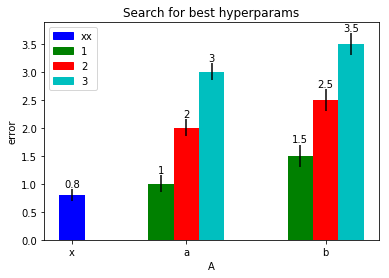

In [35]:

ticks = []
offsets = []
offset = 0
for model, settings in data.items():
    offset += W
    ticks.append(model)
    offsets.append(offset + (len(settings) + 1) * W3/2.0)
    for setting, results in settings.items():
        offset += W2
        plt.bar(offset,  results['mean'], yerr=results['std'], width=W3, color=legend[setting])
        plt.text(offset, results['mean'] + results['std'], results['mean'], ha='center', va='bottom')
        
plt.title("Search for best hyperparams")
plt.xlabel('A')
plt.xticks(offsets, ticks)
plt.ylabel('error')
plt.legend(handles=[mpatches.Patch(color=c, label=l) for l, c in legend.items()], loc='best')
plt.show()

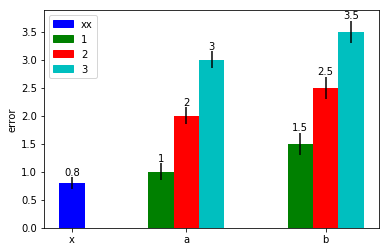

In [41]:
from visualization.plot_results import plot_results

plot_results(data, save_path="./results/fig.png")